# Final Project - Bank Marketing Analysis using Bayesian Computation

### Problem Statement

In this project, we aim to apply a Bayesian statistical technique to analyze a real-world dataset from a bank's marketing campaign. Specifically, we consider a case from a XYZ Bank, which has been running direct marketing efforts to encourage customers to subscribe to term deposits. The bank is interested in addressing the following three key questions:

1. Which factors influence a customer's decision to subscribe to a term deposit?

2. Who are the most promising target customers that the bank should contact?

3. How effective is the current marketing campaign in converting contacted customers?

To address these questions, we will use a Bayesian Logistic Regression model with Normal (Laplace) Approximation. This method allows us to quantify uncertainty in parameter estimates and derive probabilistic insights into customer behavior. The model not only identifies the most influential factors but also enables customer-level predictions and campaign performance evaluation—making it a comprehensive tool for data-driven decision-making in marketing.

###Report Layout
1. Introduction

2. Model Introduction

3. Data Exploration

4. Model Evaluation

    A. Bayesian Logistic Regression Model using Laplace Normal Approximation

    B. Identifying Target Customers

    C. Campaign Effectiveness

5. Model Summary

6. Conclusion

7. References



### 1. Introduction

A XYZ bank wants to explores customer data from a marketing campaign to encourage people to open term deposit accounts. The marketing dataset includes information about each customer's age, job, financial situation, and how and when the bank contacted them. It also records whether or not the customer decided to open a term deposit as a result of the campaign.

Through this report, we are trying to analyse below 3 points that will help the bank in better decision-making -

**A. Determining different factors that affect the subscription to term deposit**

We look at the data to find corelation such as which types of customers were more likely to say yes, or how the timing and method of contact affected the outcome. These insights can help banks better understand their customers and improve future campaigns.

**B. Identifying target customers**

Wth the help of statistical method we try to estimate how likely a customer is to open a term deposit. This approach not only makes predictions but also shows how confident we are in those predictions, which helps in making informed decisions.

For better analysis, we have considered below 4 specific customer profiles and predict their probability of subscribing to term deposits:

  Case 1: Customer is not contacted and not previously subscribed to any deposits.

  Case 2: Customer is not contacted but previously subscribed to term deposit.

  Case 3: Customer is contacted and not subscribed to any deposits.

  Case 4: Customer is contacted and previously subscribed to deposits.

**C. Campaign Effectiveness**

By evaluating the probability of customers subscribing to term deposits after being contacted, we can gain valuable insights into the effectiveness of the campaign.

In short, this report aims to uncover what drives customer decisions and to help design smarter, more effective marketing strategies based on data.



### 2. Model Introduction
**Bayesian Logistic Regression Model with Laplace Approximation**

Bayesian logistic regression is a statistical modeling technique used to estimate the probability of a binary outcome (like "yes" or "no", "success" or "failure")—in our case, whether a customer will subscribe to a term deposit.

It is built on traditional logistic regression, which models the relationship between predictor variables (such as age, job, balance, etc.) and a binary outcome using the logistic (sigmoid) function. What makes it Bayesian is that it incorporates prior beliefs about the model’s parameters (coefficients) and updates these beliefs using the observed data to produce a posterior distribution.

**Laplace Approximation**

The Laplace approximation is a method used in Bayesian analysis to make complex calculations easier and faster. In Bayesian modeling, we want to understand the range of possible values for model parameters based on the data. This range is called the posterior distribution, and it can often be difficult to compute directly.

The Laplace approximation simplifies this by doing two things:

* It finds the most likely values of the model parameters — this is called the MAP estimate (Maximum A Posteriori).

* Then, it assumes the rest of the distribution around this point looks like a normal (bell-shaped) curve.

By using this approach, we can quickly estimate the uncertainty around our model’s parameters without needing slow and complex sampling methods.


**How it works:**

**A. Prior Distribution:**

You start with an initial belief about the model parameters (e.g., they’re likely to be small or centered around zero).

**B. Likelihood Function:**

Based on the data, you calculate how likely the observed outcomes are for a given set of parameters.

**C. Posterior Distribution:**

You combine the prior and likelihood (via Bayes’ theorem) to get a full probability distribution for each model parameter.

In this report, Bayesian logistic regression is used to estimate the probability that a customer will subscribe to a term deposit, based on various demographic and behavioral factors. By incorporating uncertainty in model parameters and generating full posterior distributions, this approach allows for more informed and confident predictions. It also enables the inclusion of prior knowledge, making it particularly valuable in optimizing targeted marketing strategies.

**Why Use Bayesian Over Traditional Methods?**

Unlike traditional logistic regression, which provides single-point estimates for model parameters, Bayesian logistic regression produces full probability distributions for each parameter. This allows us to not only estimate the strength and direction of influence for each factor (e.g., age, job type, education level) but also to quantify how uncertain we are about those estimates.

Overall, the Bayesian approach provides richer insights, more robust predictions, and a clearer understanding of the confidence behind each decision, making it a strong choice for evaluating marketing campaign effectiveness.

### 3. Data Exploration
We will load the dataset in R and explore the data. We will try to analyse the relationship between various parameters through visualization.

First, we will load the necessary packages in R.

In [20]:
#Importing necessary libraries
install.packages('caret')
library('ggplot2')
library('dplyr')
library('tidyr')
library('caret')
library('Matrix')
library('tibble')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading the bank marketing dataset in R and checking for any missing or null values.

In [21]:
#load the csv file
bank_data<-read.csv('bank_marketing_dataset.csv')
head(bank_data,10)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
6,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
7,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
8,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
9,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes


In [22]:
#Check for missing records
colSums(is.na(bank_data))
glimpse(bank_data)

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
  deposit 
        0

Rows: 56,373
Columns: 17
$ age       <int> 59, 56, 41, 55, 54, 42, 56, 60, 37, 28, 38, 30, 29, 46, 31, …
$ job       <chr> "admin.", "admin.", "technician", "services", "admin.", "man…
$ marital   <chr> "married", "married", "married", "married", "married", "sing…
$ education <chr> "secondary", "secondary", "secondary", "secondary", "tertiar…
$ default   <chr> "no", "no", "no", "no", "no", "no", "no", "no", "no", "no", …
$ balance   <int> 2343, 45, 1270, 2476, 184, 0, 830, 545, 1, 5090, 100, 309, 1…
$ housing   <chr> "yes", "no", "yes", "yes", "no", "yes", "yes", "yes", "yes",…
$ loan      <chr> "no", "no", "no", "no", "no", "yes", "yes", "no", "no", "no"…
$ contact   <chr> "unknown", "unknown", "unknown", "unknown", "unknown", "unkn…
$ day       <int> 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, …
$ month     <chr> "may", "may", "may", "may", "may", "may", "may", "may", "may…
$ duration  <int> 1042, 1467, 1389, 579, 673, 562, 1201, 1030, 608, 1297, 786,…
$ campaign  <in

We are using "colSums(is.na(bank_data))" command to check for missing values and as per the results the data is clean.
With the help of visualization, we will analyse the relationship between various variables and check the data distribution of different parameters.

**A. Data Distribution of Age Parameter-**

From the data distribution it is clear that majority of the customer's age lies between 25 to 45 year.


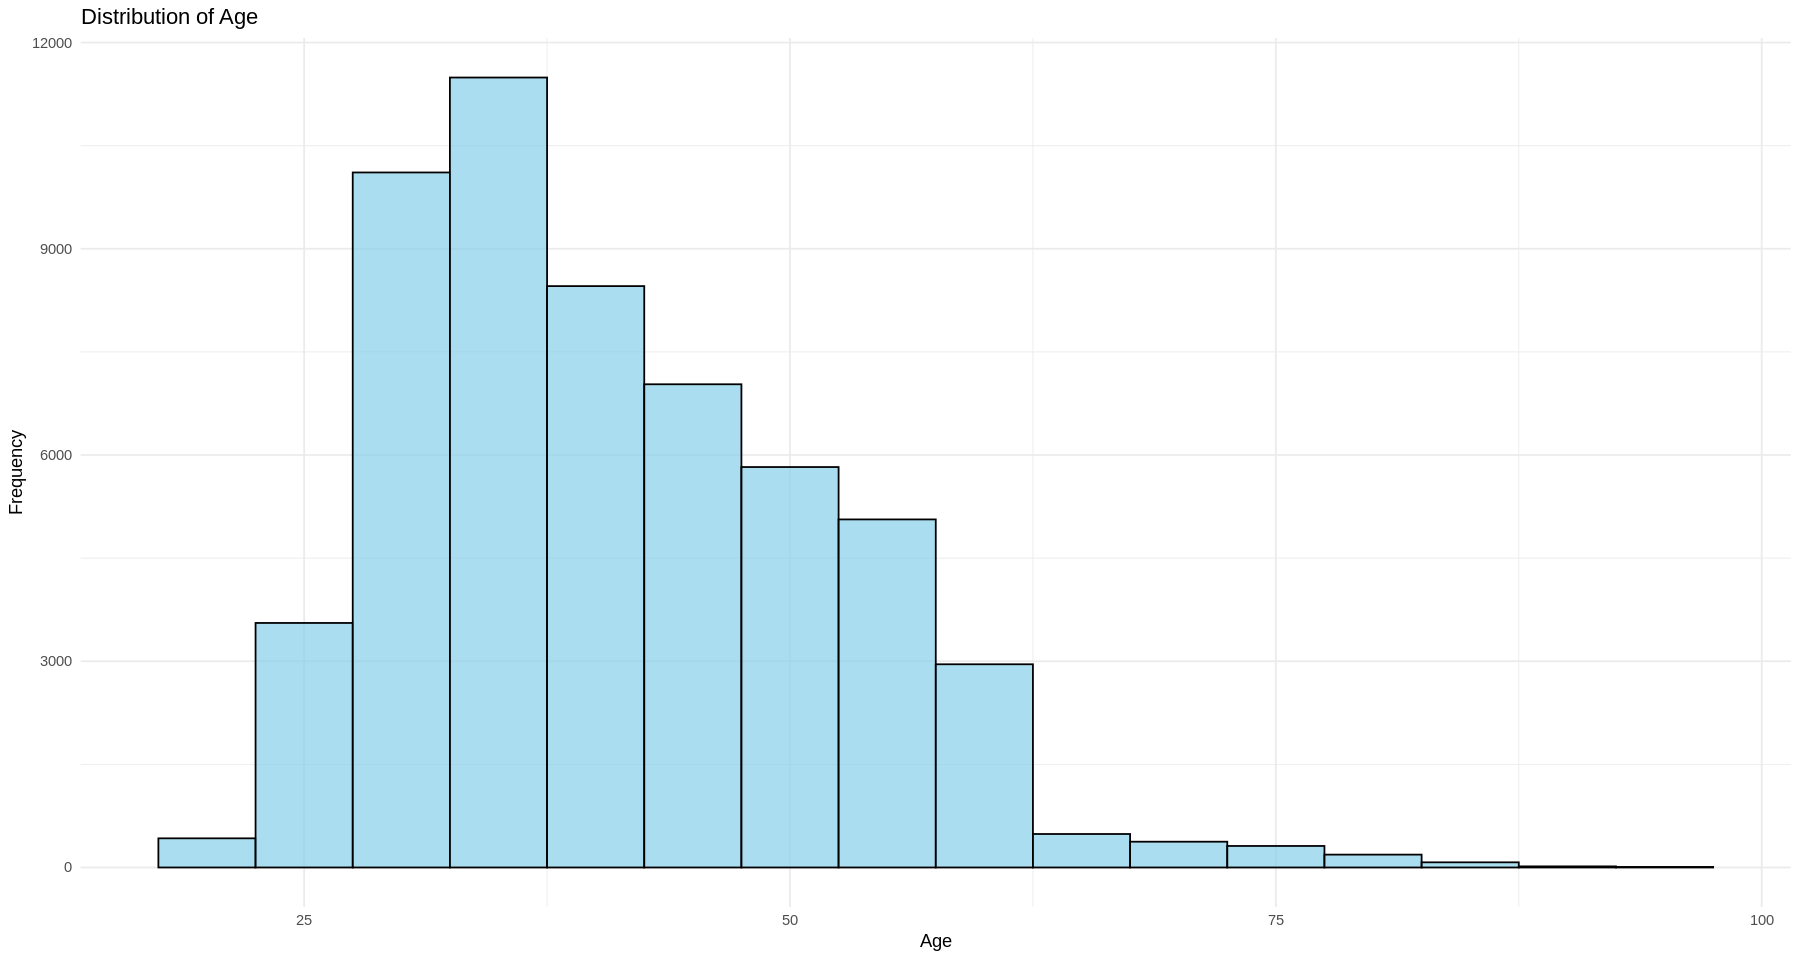

In [23]:
#Data Exploration
# Histogram for age using ggplot2
options(repr.plot.width=15, repr.plot.height=8)

ggplot(bank_data, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Age", x = "Age", y = "Frequency") +
  theme_minimal()

**B. Data distribution of Job -**

The majority of customers in the dataset are employed in blue-collar, management, and technician job roles. A smaller portion work in administrative and service positions, while fewer customers belong to other occupational categories.

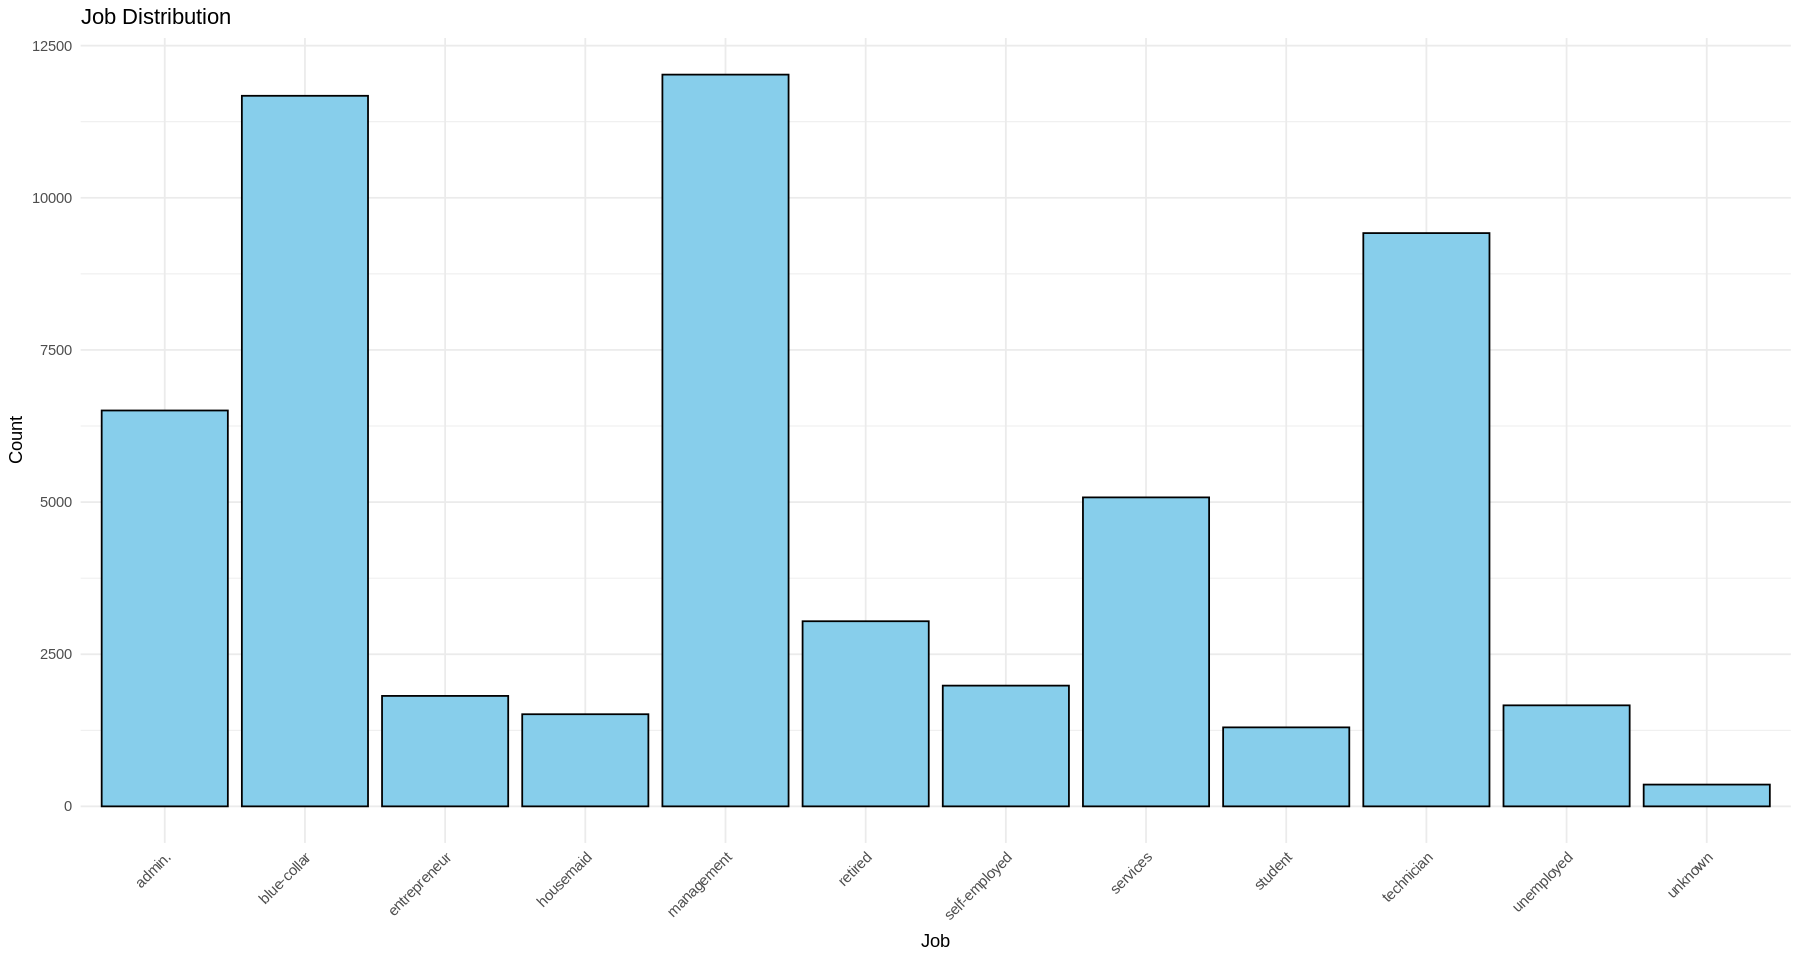

In [24]:
#Job
ggplot(bank_data, aes(x = job)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Job Distribution", x = "Job", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**C. Data Distribution of Education -**

As observed in the dataset, approximately 50% of customers have a secondary level of education, around 30% have attained tertiary education, and a smaller proportion have only primary education.

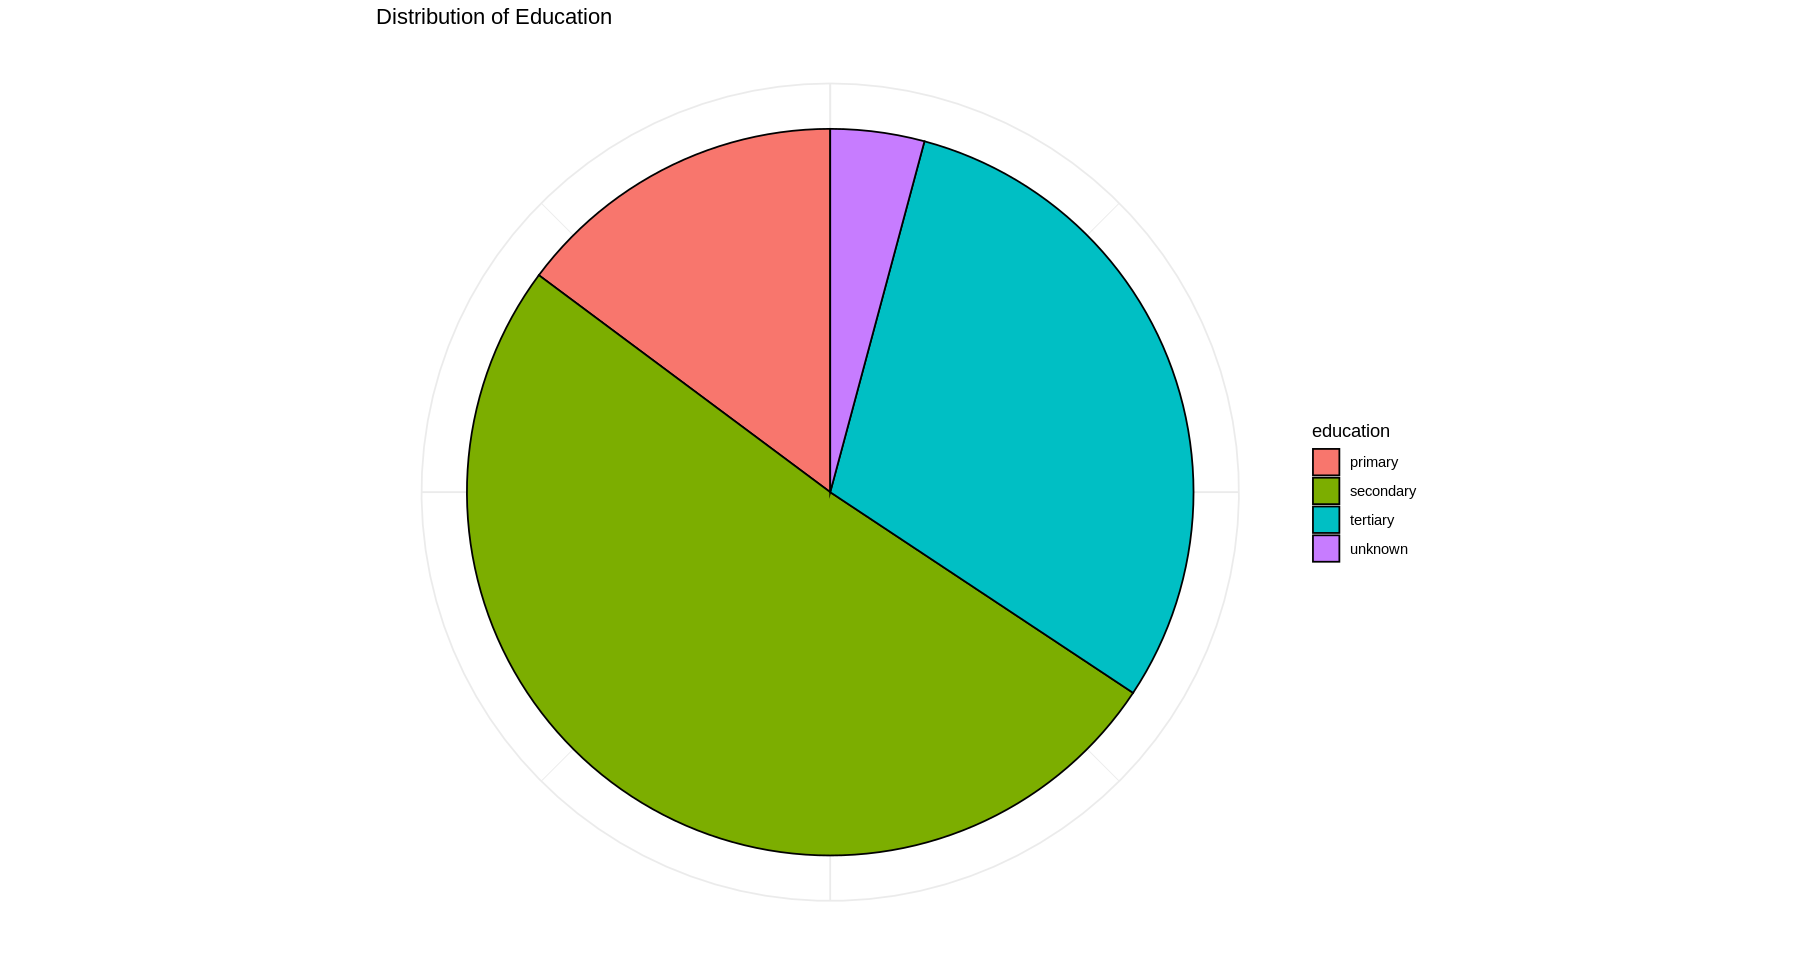

In [28]:
#Education
ed_data <- bank_data %>%
  count(education) %>%
  mutate(percentage = n / sum(n) * 100)  # Calculate percentages

ggplot(ed_data, aes(x = "", y = percentage, fill = education)) +
  geom_bar(stat = "identity", width = 1, color = "black") +
  coord_polar(theta = "y") +  # Convert bar chart to pie chart
  labs(title = "Distribution of Education", x = NULL, y = NULL) +
  theme_minimal() +
  theme(axis.text = element_blank(), axis.ticks = element_blank())

**D. Relation between age and balance:**

As observed from the distribution, there are very less people with more than 30000 dollar as their balance. Across all the age, the balance amount seems to be less than 12500 dollar.

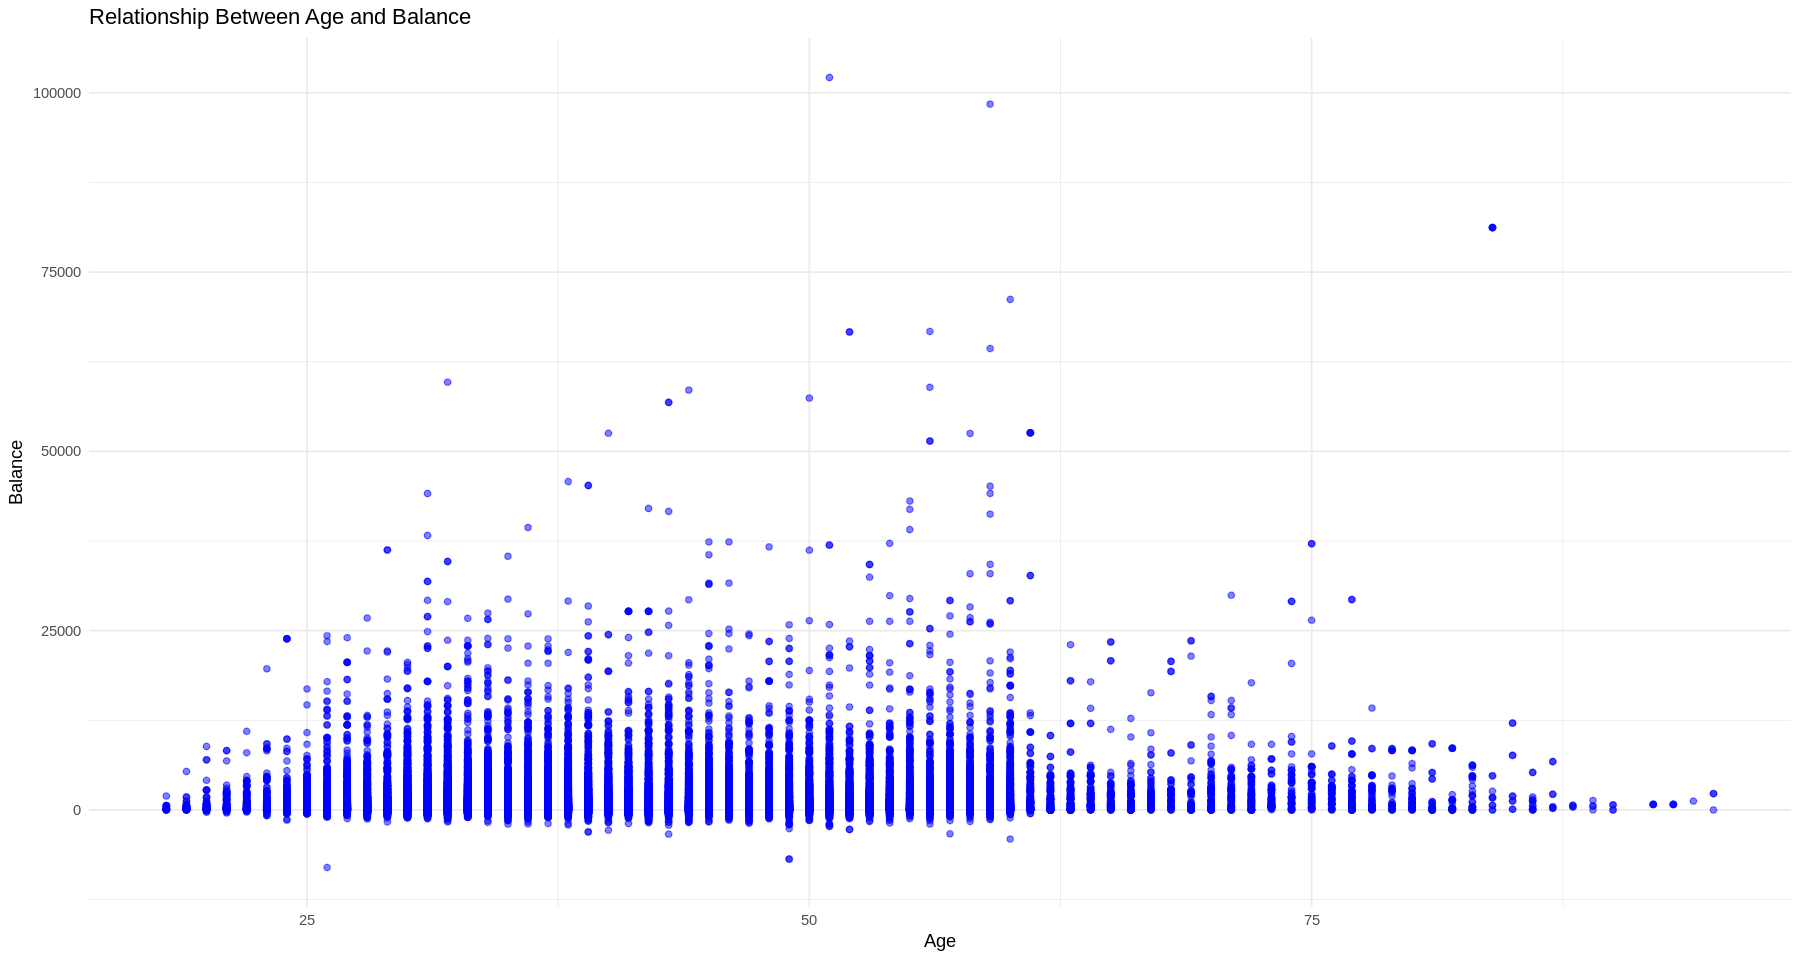

In [30]:
#age vs balance
ggplot(bank_data, aes(x = age, y = balance)) +
  geom_point(color = "blue", alpha = 0.5) +  # Add points with transparency
  labs(title = "Relationship Between Age and Balance", x = "Age", y = "Balance") +
  theme_minimal()


**E. Relation between Age and Deposit**

Based on the visualization, it is difficult to determine which age group has a higher proportion of deposit subscriptions. Customers aged 30 to 50 appear to be almost evenly split between those who subscribed and those who did not. This suggests that age alone may not be a strong predictor of a customer's likelihood to subscribe to a term deposit.

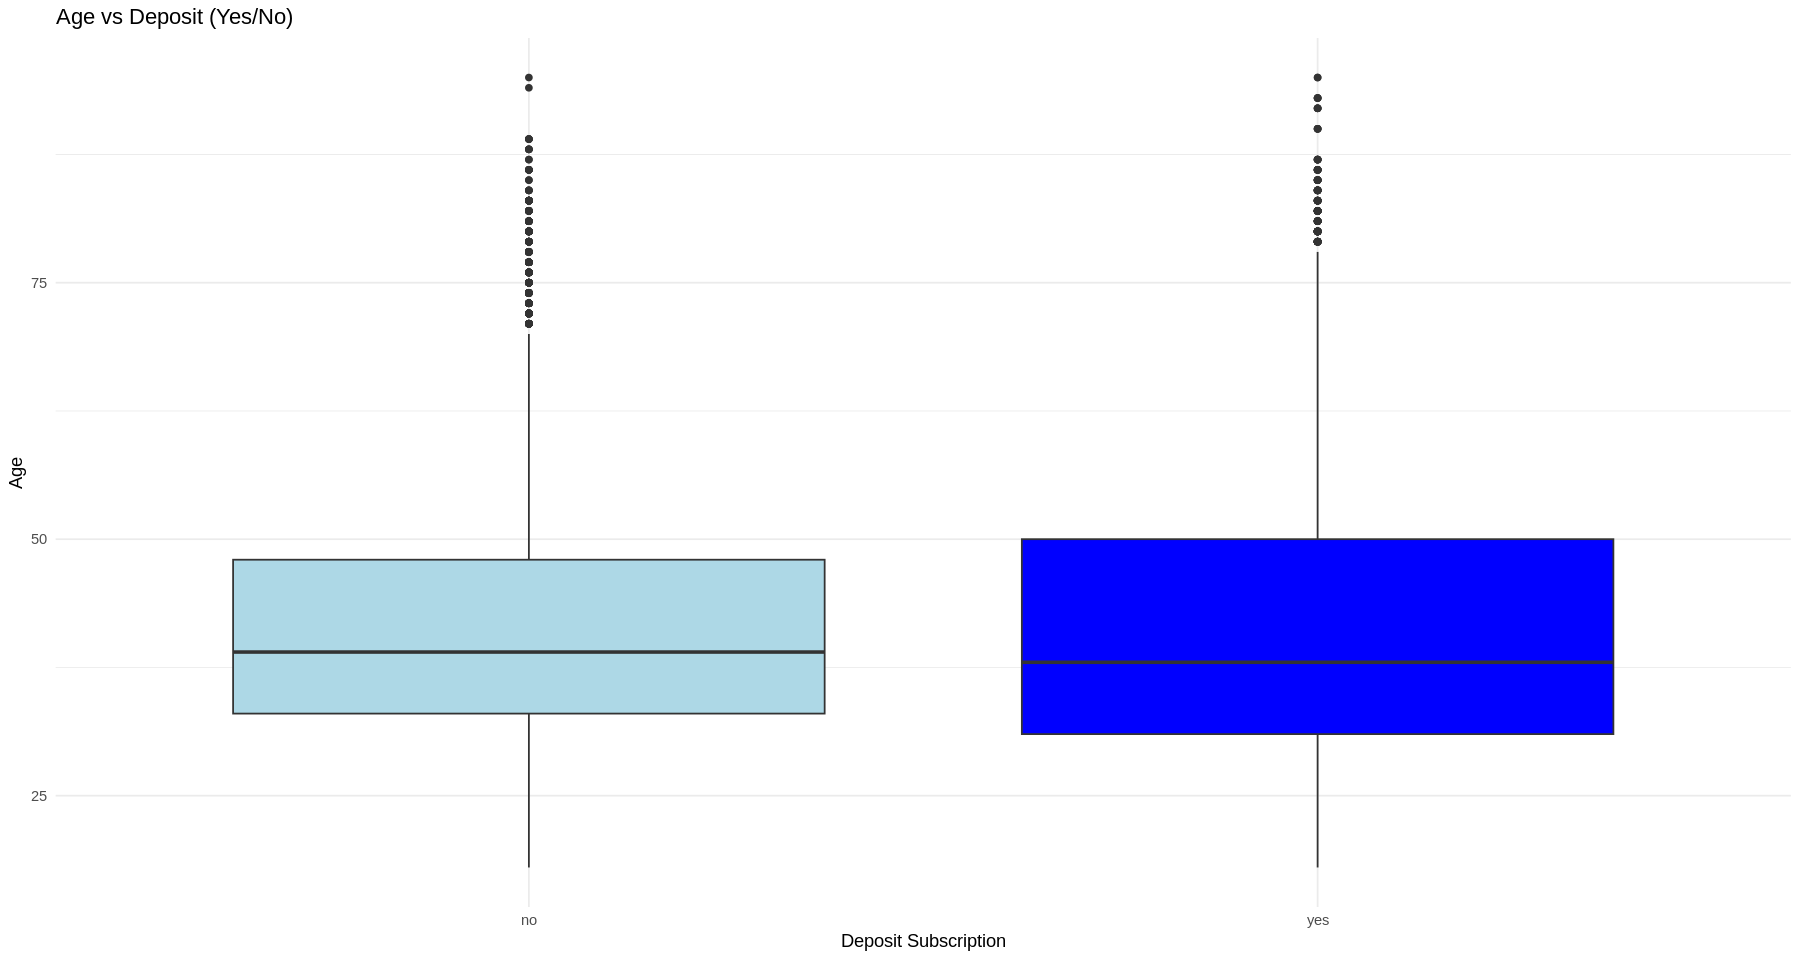

In [34]:
# Create boxplot to compare age vs deposit (Yes vs No)
ggplot(bank_data, aes(x = deposit, y = age, fill = deposit)) +
  geom_boxplot() +
  labs(title = "Age vs Deposit (Yes/No)",
       x = "Deposit Subscription",
       y = "Age") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "blue")) +
  theme(legend.position = "none")


**F. Relation between Education and Deposit -**

Based on the data, individuals with a tertiary education or unknown education level exhibit a stronger likelihood of each showing more than 20% probability of subscribing to a term deposit. In contrast, those with primary and secondary education levels show a slightly lower probability of subscription.

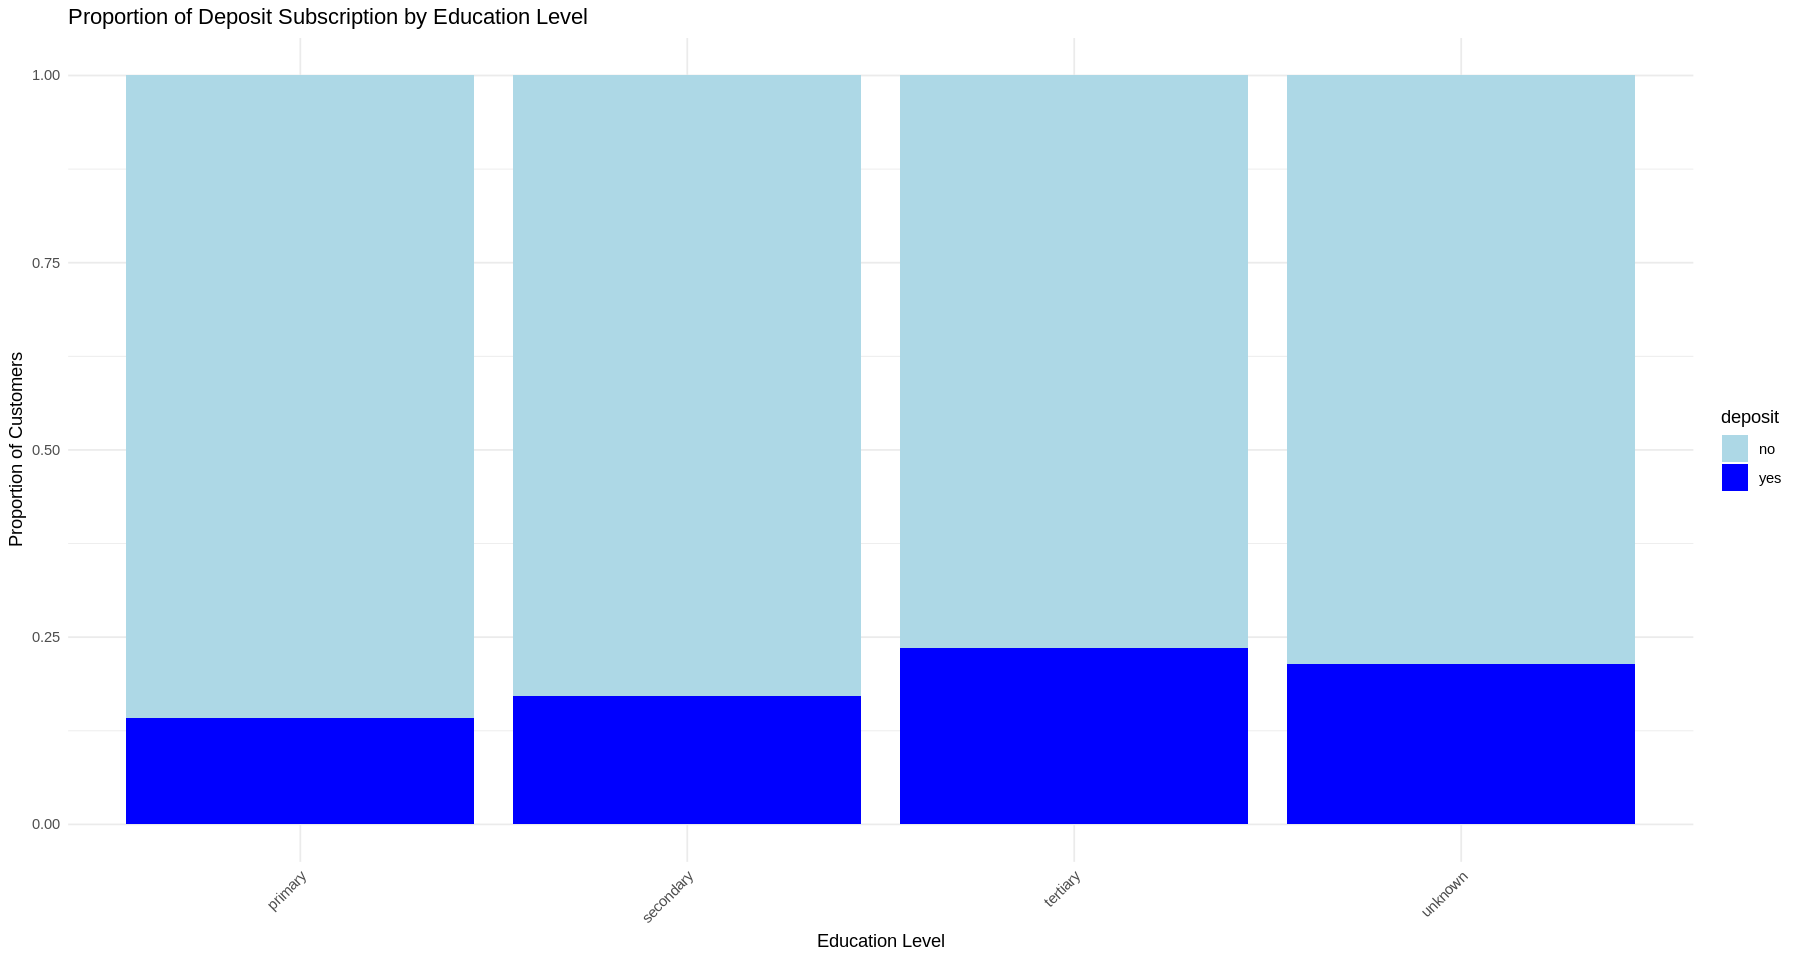

In [31]:
#deposit vs education
ggplot(bank_data, aes(x = education, fill = deposit)) +
  geom_bar(position = "fill") +  # 'fill' stacks bars to show proportions
  labs(title = "Proportion of Deposit Subscription by Education Level",
       x = "Education Level",
       y = "Proportion of Customers") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "blue")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**G. Relationship between Job and Deposit -**

The visualization indicates that individuals who are of student, retired, and unemployed categories show a higher likelihood of subscribing to a term deposit. In contrast, people in other occupational groups display a relatively lower level of interest in the term deposit plan.

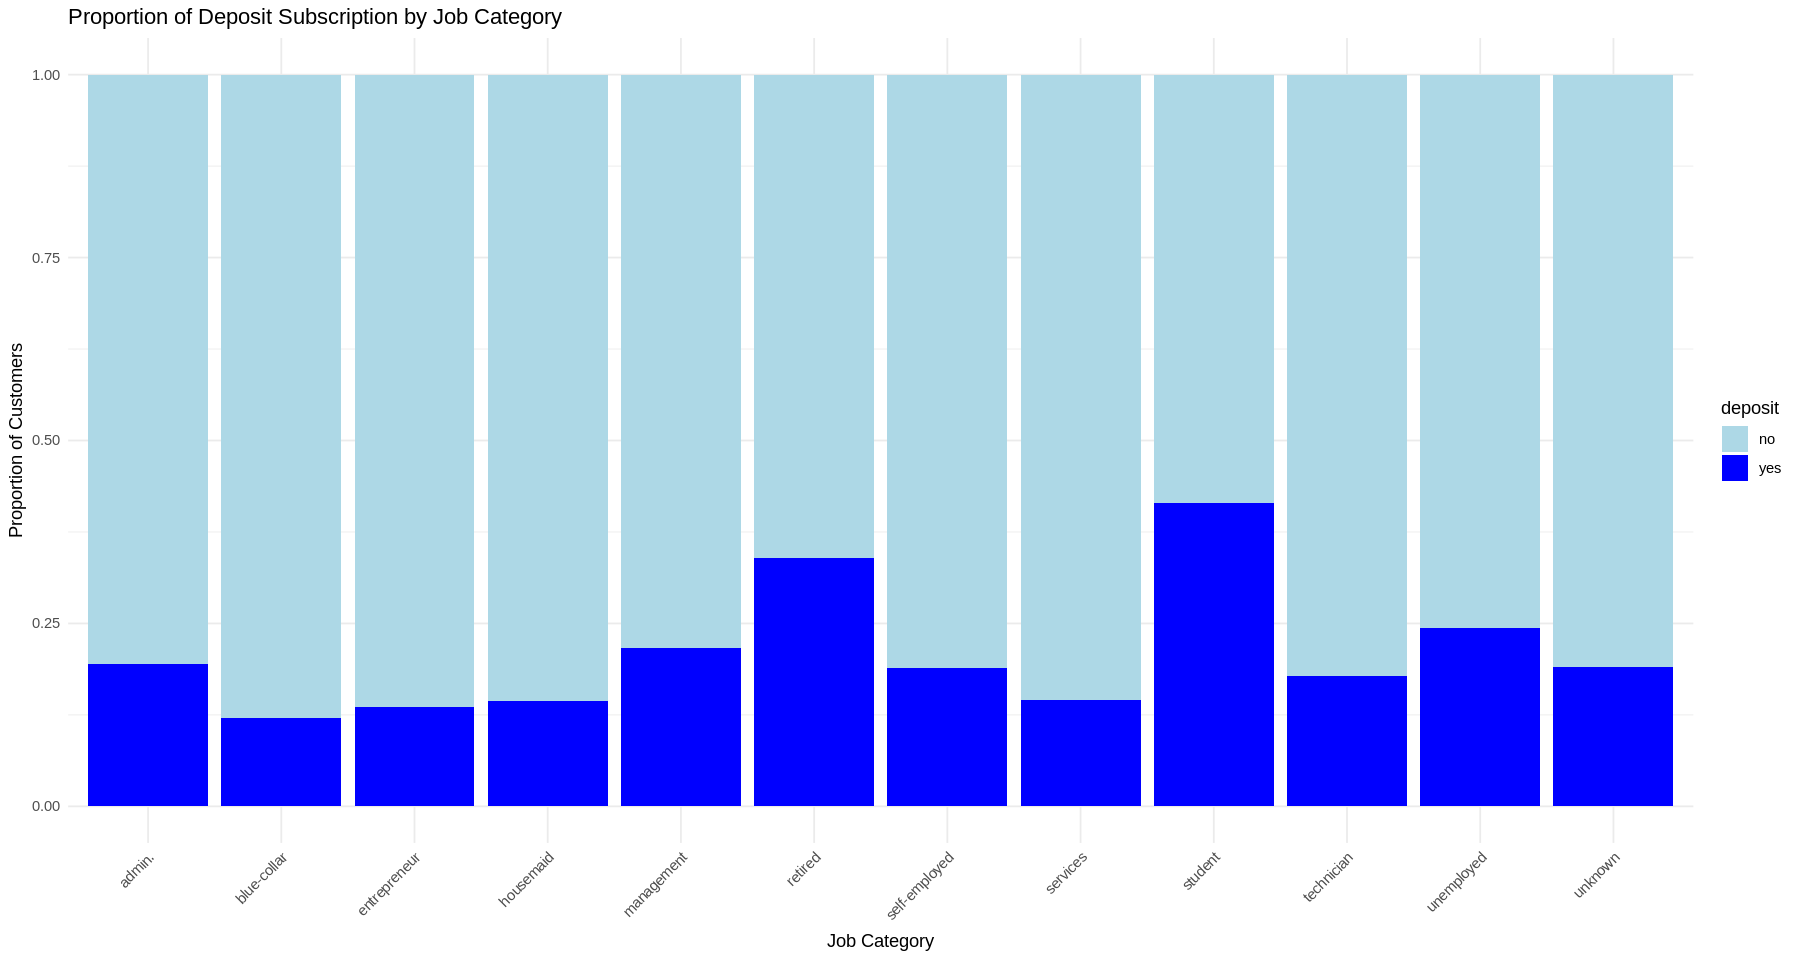

In [32]:
#deposit vs job
ggplot(bank_data, aes(x = job, fill = deposit)) +
  geom_bar(position = "fill") +  # 'fill' stacks bars to show proportions
  labs(title = "Proportion of Deposit Subscription by Job Category",
       x = "Job Category",
       y = "Proportion of Customers") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", 'blue')) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### 4. Model Evaluation

To assess the outcomes of the bank’s marketing campaign, we focus on three key objectives:

A. Understanding the various factors that influence a customer’s decision to subscribe to a term deposit.

B. Identifying potential target customers by predicting their likelihood of subscribing.

C. Evaluating the overall effectiveness of the campaign by estimating the probability of successful subscriptions across the customer base.

To address these objectives, we apply a Bayesian Logistic Regression model with Normal (Laplace) Approximation, which allows us to uncover underlying patterns in the data and quantify the uncertainty in predictions. This approach not only identifies the most influential variables but also provides a probabilistic framework for estimating the likelihood of customer subscription.

**A. Understanding the various factors that influence a customer’s decision to subscribe to a term deposit.**

By analyzing the factors that influence a customer’s decision to subscribe to a term deposit, we gain valuable insights into which customer characteristics and behaviors are most associated with positive responses to the marketing campaign. The analysis reveals that variables such as job type, education level, previous campaign outcome, and contact method play a significant role in shaping customer decisions. These findings allow us to develop customer profiles that are more responsive to marketing efforts and help refine campaign strategies. Ultimately, understanding these influencing factors supports more targeted and efficient outreach, maximizing the effectiveness of future marketing initiatives.


In [11]:
bank <- bank_data %>%
  mutate(across(c(job, marital, education, default, housing, loan, contact, month, poutcome, deposit), as.factor)) %>%
  mutate(deposit = as.numeric(deposit == "yes"))  # Convert target to 0/1

# Split numeric and categorical
num_vars <- c("age", "balance", "day", "duration", "campaign", "pdays", "previous")
cat_vars <- c("job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome")

scaled_num <- scale(bank[num_vars])
means <- attr(scaled_num, "scaled:center")
sds <- attr(scaled_num, "scaled:scale")

# Then combine
X <- cbind(model.matrix(~ . - 1, data = bank[cat_vars]), scaled_num)
y <- bank$deposit



#posterior calculation
sigmoid <- function(x) {
  1 / (1 + exp(-x))
}

log_prior <- function(theta, sigma2 = 100) {
  -0.5 * sum(theta^2 / sigma2)
}

log_likelihood <- function(theta, X, y) {
  eta <- X %*% theta
  sum(y * eta - log(1 + exp(eta)))
}

log_posterior <- function(theta, X, y, sigma2 = 100) {
  log_prior(theta, sigma2) + log_likelihood(theta, X, y)
}

neg_log_posterior <- function(theta, X, y, sigma2 = 100) {
  -log_posterior(theta, X, y, sigma2)
}

theta_init <- rep(0, ncol(X))

opt_result <- optim(
  par = theta_init,
  fn = neg_log_posterior,
  gr = NULL,
  X = X,
  y = y,
  method = "BFGS",
  hessian = TRUE
)

theta_map <- opt_result$par
hessian <- opt_result$hessian
cov_matrix <- solve(hessian)



In [12]:
set.seed(42)
posterior_samples <- MASS::mvrnorm(n = 1000, mu = theta_map, Sigma = cov_matrix)

# Create a summary table
posterior_summary <- tibble(
  predictor = colnames(X),
  mean = theta_map,
  sd = sqrt(diag(cov_matrix)),
  lower_95 = theta_map - 1.96 * sqrt(diag(cov_matrix)),
  upper_95 = theta_map + 1.96 * sqrt(diag(cov_matrix))
)

print(posterior_summary, n = Inf)



# A tibble: 43 × 5
   predictor              mean     sd  lower_95 upper_95
   <chr>                 <dbl>  <dbl>     <dbl>    <dbl>
 1 jobadmin.          -0.863   0.106  -1.07      -0.655 
 2 jobblue-collar     -1.18    0.101  -1.38      -0.987 
 3 jobentrepreneur    -1.23    0.131  -1.48      -0.970 
 4 jobhousemaid       -1.36    0.130  -1.62      -1.11  
 5 jobmanagement      -1.05    0.107  -1.25      -0.837 
 6 jobretired         -0.603   0.113  -0.823     -0.382 
 7 jobself-employed   -1.19    0.125  -1.44      -0.949 
 8 jobservices        -1.11    0.111  -1.32      -0.889 
 9 jobstudent         -0.440   0.122  -0.680     -0.201 
10 jobtechnician      -1.03    0.105  -1.24      -0.824 
11 jobunemployed      -1.04    0.123  -1.28      -0.799 
12 jobunknown         -1.22    0.201  -1.61      -0.824 
13 maritalmarried     -0.178   0.0455 -0.267     -0.0888
14 maritalsingle       0.0943  0.0521 -0.00773    0.196 
15 educationsecondary  0.184   0.0498  0.0860     0.281 
16 education

**Interpretation of Results:**

This model predicts the probability that a customer subscribes to a term deposit (deposit = "yes") using various features like job, marital status, education, contact method, month, etc. The coefficients represent changes in log-odds of subscribing and their Bayesian posterior distributions are summarized by:
* mean = the posterior mean of coefficient. Positive mean indicates increase in likelihood of subscription and negative mean decreases the chances.
* sd = standard deviation
* lower_95 and upper_95 = 95% credibility interval

Note:

* Log-odds are just a different way of expressing probability. It is a way of expressing the relationship between a probability and its complement.

* Credibility interval gives a range of values within which a model parameter is likely to fall, based on the data and prior beliefs.

Below are key findings based on the results:

Below are the list of strong predictors ie parameters that highly influence the customer's decision-

* poutcomesuccess: +2.31

Huge positive effect: customers with successful previous campaign have much higher odds of subscribing again.

* duration: +1.29

One of the strongest predictors. The longer the call, the more likely the subscription.

* monthmar, monthsep, monthoct, monthdec

The months of March, September, October and December have positive effects, suggesting higher campaign effectiveness in those periods.

Below is the list of parameters which are positive but have less impact on customer's decision making.

* educationsecondary: +0.184
* educationtertiary:  +0.399   
* educationunknown:   +0.265
* monthjun:           +0.428

The parameters with negative value indicate that the customers with these values are less likely to subscribe. These factors reduces the odds of success.

**Summary:**

The model shows that previous successful subscrition history, call duration, and certain months (March, September, October and December) strongly increase the chance of a customer subscribing. In contrast, some job types and having a loan reduce that likelihood. The model is highly confident in these effects based on the narrow 95% credible intervals. We also observe that call duration is one of the most influential levers, indicating that investing in longer, quality customer conversations may provide better results.





**B. Identifying potential target customers by predicting their likelihood of subscribing.**

By predicting each customer's likelihood of subscribing to a term deposit, we can identify those who are most likely to respond positively to the campaign. This allows the bank to focus its marketing efforts on high-potential customers, increasing efficiency and reducing costs. Using the Bayesian logistic regression model, we estimate the probability of subscription for each individual based on their demographic and behavioral characteristics. Customers with higher predicted probabilities can be prioritized for follow-up, personalized communication, or targeted offers. This data-driven targeting improves the effectiveness of the campaign and helps the bank allocate resources more strategically.

For identifying target customers, we consider 4 specific cases based on the results of bayesian logistic regression model. The model indicates that two variables — whether the customer was contacted during the campaign and the outcome of any previous subscription attempts — have a significant influence on the likelihood of subscription.

Based on these two key factors, we define the following four cases:

**Case 1:** Customer was not contacted and has not previously subscribed to a term deposit.

**Case 2:** Customer was not contacted but had previously subscribed to a term deposit.

**Case 3:** Customer was contacted but did not previously subscribe to a term deposit.

**Case 4:** Customer was contacted and had previously subscribed to a term deposit.

These cases allow us to evaluate and compare the predicted probability of subscription for different customer profiles. By doing so, we can prioritize outreach to customers in the most promising segments—particularly those in scenarios where the model predicts a higher likelihood of a positive response—thus enhancing the effectiveness of future marketing efforts.

**Case 1: Customer was not contacted and has not previously subscribed to a term deposit.**

Based on this customer profile, we are trying to predict the probability of these customers subscribing to term deposits. In this case, the customer is not contacted and not previously subscribed to any term deposits.

In [13]:
predict_bayes_probability <- function(new_customer, bank, posterior_samples, means, sds) {
  require(Matrix)

  factor_vars <- c("job", "marital", "education", "default", "housing",
                   "loan", "contact", "month", "poutcome")

  for (var in factor_vars) {
    new_customer[[var]] <- factor(new_customer[[var]], levels = levels(bank[[var]]))
  }

  cat_matrix <- model.matrix(~ . - 1, data = new_customer[factor_vars])

  num_vars <- c("age", "balance", "day", "duration", "campaign", "pdays", "previous")
  num_scaled <- scale(new_customer[num_vars], center = means, scale = sds)

  X_new <- as.matrix(cbind(cat_matrix, num_scaled))

  sigmoid <- function(x) 1 / (1 + exp(-x))

  probs <- apply(posterior_samples, 1, function(theta) {
    sigmoid(as.numeric(X_new %*% theta))
  })

  list(
    mean_prob = mean(probs),
    credible_interval = quantile(probs, c(0.025, 0.975)),
    all_samples = probs
  )
}

new_customer1 <- data.frame(
  age = 40,
  job = "blue-collar",
  marital = "married",
  education = "secondary",
  default = "no",
  balance = 800,
  housing = "yes",
  loan = "no",
  contact = "cellular",
  day = 15,
  month = "may",
  duration = 0,
  campaign = 1,
  pdays = 999,
  previous = 0,
  poutcome = "unknown"
)

result <- predict_bayes_probability(new_customer1, bank, posterior_samples, means, sds)

print(paste("Posterior mean probability:", round(result$mean_prob, 3)))
print(paste("95% credible interval:", paste(round(result$credible_interval, 3), collapse = " - ")))


[1] "Posterior mean probability: 0.025"
[1] "95% credible interval: 0.015 - 0.039"


**Interpretation of Results-**

As per the results, the predited probability of this customer subscribing is 2% with 95% confidence interval of 1% - 3%.

**Case 2: Customer was not contacted but had previously subscribed to a term deposit.**

In this case, the customer is not contacted but has previously subscribed to term deposits.

In [15]:
new_customer2 <- data.frame(
  age = 40,
  job = "blue-collar",
  marital = "married",
  education = "secondary",
  default = "no",
  balance = 800,
  housing = "yes",
  loan = "no",
  contact = "cellular",
  day = 15,
  month = "may",
  duration = 0,
  campaign = 1,
  pdays = 5,
  previous = 1,
  poutcome = "success"
)

result <- predict_bayes_probability(new_customer2, bank, posterior_samples, means, sds)

print(paste("Posterior mean probability:", round(result$mean_prob, 3)))
print(paste("95% credible interval:", paste(round(result$credible_interval, 3), collapse = " - ")))


[1] "Posterior mean probability: 0.241"
[1] "95% credible interval: 0.211 - 0.273"


**Interpretation of Results-**

As per the results, the predited probability of this customer subscribing is 24% with 95% confidence interval of 21% - 27%.

**Case 3: Customer was contacted but did not previously subscribe to a term deposit.**

In this case, the customer is contacted by means of cellular or telephone but has not previously subscribed to term deposits.

In [16]:
new_customer3 <- data.frame(
  age = 40,
  job = "blue-collar",
  marital = "married",
  education = "secondary",
  default = "no",
  balance = 800,
  housing = "yes",
  loan = "no",
  contact = "cellular",
  day = 15,
  month = "may",
  duration = 180,
  campaign = 1,
  pdays = 999,
  previous = 0,
  poutcome = "unknown"
)

result <- predict_bayes_probability(new_customer3, bank, posterior_samples, means, sds)

print(paste("Posterior mean probability:", round(result$mean_prob, 3)))
print(paste("95% credible interval:", paste(round(result$credible_interval, 3), collapse = " - ")))


[1] "Posterior mean probability: 0.055"
[1] "95% credible interval: 0.034 - 0.085"


**Interpretation of Results-**

As per the results, the predited probability of this customer subscribing is 5% with 95% confidence interval of 3% - 8%.

**Case 4: Customer was contacted and had previously subscribed to a term deposit.**

In this case, the customer is contacted by means of cellular or telephone and also has subscribed to term deposit before.

In [17]:
new_customer4 <- data.frame(
  age = 40,
  job = "blue-collar",
  marital = "married",
  education = "secondary",
  default = "no",
  balance = 800,
  housing = "yes",
  loan = "no",
  contact = "cellular",
  day = 15,
  month = "may",
  duration = 120,
  campaign = 1,
  pdays = 30,
  previous = 1,
  poutcome = "success"
)

result4 <- predict_bayes_probability(new_customer4, bank, posterior_samples, means, sds)

print(paste("Posterior mean probability:", round(result4$mean_prob, 3)))
print(paste("95% credible interval:", paste(round(result4$credible_interval, 3), collapse = " - ")))


[1] "Posterior mean probability: 0.354"
[1] "95% credible interval: 0.319 - 0.392"


**Interpretation of Results-**

As per the results, the predited probability of this customer subscribing is 35% with 95% confidence interval of 32% - 39%.

**Summary-**

The results suggest that previous subscription history and contact status are strong indicators of a customer’s likelihood to subscribe to a term deposit. Customers in Case 4 (contacted and previously subscribed) show the highest predicted probability, while those in Case 1 (not contacted and never subscribed) have the lowest. Customers in Case 2 (not contacted bt have previously subscribed to term deposit) also exhibit a strong likelihood to subscription.

### C. Campaign Effectiveness

Understanding the effectiveness of a marketing campaign is crucial for optimizing resource allocation and maximizing returns. By assessing the outcomes of the campaign, we can determine which strategies are working and which needs improvement.

Through this analysis, we aim to evaluate how many customers who were contacted actually subscribed to a term deposit. By doing so, we are assessing the effectiveness of the campaign in terms of the conversion rate—that is, the number of term deposit subscriptions relative to the marketing efforts made. Understanding this relationship helps measure the success of the campaign, highlighting the impact of customer outreach on actual subscription behavior. This analysis is crucial for optimizing future campaigns and ensuring that marketing resources are being utilized efficiently to achieve the desired outcomes.

In [18]:

contacted <- bank_data[bank_data$contact %in% c("cellular", "telephone"), ]

nrow(contacted)

effectiveness_rate <- mean(contacted$deposit == "yes")
print(paste("Deposit rate among contacted customers:", round(effectiveness_rate * 100, 2), "%"))

successes <- sum(contacted$deposit == "yes")
trials <- nrow(contacted)

alpha_post <- 1 + successes
beta_post <- 1 + trials - successes

posterior_mean <- alpha_post / (alpha_post + beta_post)
credible_interval <- qbeta(c(0.025, 0.975), alpha_post, beta_post)

print(paste("Posterior mean effectiveness:", round(posterior_mean, 3)))
print(paste("95% credible interval:", paste(round(credible_interval, 3), collapse = " - ")))


[1] 41007

[1] "Deposit rate among contacted customers: 23.21 %"
[1] "Posterior mean effectiveness: 0.232"
[1] "95% credible interval: 0.228 - 0.236"


**Interpretation of Results-**

1. Deposit rate among contacted customers: 23.21%

Among the customers who were contacted during the campaign, 23.21% ended up subscribing to a term deposit. This represents the conversion rate for the customers who were reached out to, showing that just over a fifth of them took action and subscribed to the term deposit.

2. Posterior mean effectiveness: 0.232

The posterior mean effectiveness of the campaign is 23%, which indicates the average predicted likelihood of a contacted customer subscribing to the term deposit. This value is derived from the Bayesian model and reflects the overall effectiveness of the campaign based on the observed data and prior assumptions.

3. 95% credible interval: 0.228 - 0.236

The 95% credible interval suggests that, based on the data and the model's assumptions, we are 95% confident that the true effectiveness of the campaign i.e., the true probability of a contacted customer subscribing lies between 22% and 23%. This interval shows a range of values that accounts for uncertainty in the model's prediction.

### 5. Model Summary

Below is the cummalative summary of insights gathered from the 3 models.

**A. Determining different factors that affect the subscription to term deposit**

To explore the key factors influencing a customer’s decision to subscribe to a term deposit, we applied a Bayesian Logistic Regression Model using Laplace Normal Approximation. This approach enables us to estimate the probability of subscription while accounting for uncertainty in the model parameters. It also provides interpretable insights into the influence of various customer and campaign-related attributes.

Below is the summary of the results:
* Highly influencial parameters -

The most impactful variables include call duration, a history of previously successful term deposit subscriptions, and being contacted in specific months—namely March, September, October, and December. These factors show a strong positive effect on the likelihood of subscription.

* Moderately influencial paramters -

Customer education levels (secondary, tertiary, and unknown), along with contact during the month of June, have a moderate effect on subscription behavior.

* Negligible or Non-Influential Factors -

Variables with negative or near-zero posterior mean values were found to have minimal or no influence on a customer’s decision to subscribe and can be deprioritized in future targeting strategies.

**B. Identifying target customers**

Identifying the right target customers is a critical step in ensuring the success of any marketing campaign. Based on insights from the Bayesian logistic regression model, we found that two key factors—whether the customer was contacted and their history of previous term deposit subscriptions—play a significant role in influencing the decision to subscribe. Leveraging these factors, we estimated the probability of subscription across different customer profiles, allowing us to focus efforts where they are most likely to succeed.

To guide this analysis, we categorized customers into the following four cases:

Case 1: Customer was not contacted and has not previously subscribed.

Case 2: Customer was not contacted but had previously subscribed.

Case 3: Customer was contacted but did not previously subscribe.

Case 4: Customer was contacted and had previously subscribed.

Summary of the results:

* Case 2 and Case 4 customers — those with a history of previous subscriptions—showed the highest probability of subscribing, especially when they were also contacted.

* Case 1 and Case 3 customers — those without prior subscriptions or who were only contacted once—had lower predicted probabilities of subscribing. However, these groups represent an opportunity: effective communication and personalized engagement may improve their response rate and convert them into deposit subscribers.

**C. Campaign Effectiveness**

After investing significant effort into the campaign, it is essential to assess its final outcomes. To evaluate the effectiveness of the campaign, we focused on measuring how many of the customers who were contacted actually subscribed to a term deposit. This helps in understanding the return on marketing efforts and guides future decision-making.

Summary of the results -

* Out of all customers, approximately 72% were contacted during the campaign.
* However, only 23.21% of those contacted actually subscribed to a term deposit, indicating a relatively modest conversion rate.
* According to the Bayesian analysis, the true probability of a contacted customer subscribing lies between 22.8% and 23.6% (based on the 95% credible interval).

These insights highlight that while the outreach covered a large portion of the customer base, only a fraction converted. This underlines the need for more targeted and personalized approaches to improve subscription rates in future campaigns.


### 6. Conclusion

This analysis aimed to evaluate the effectiveness of a bank’s term deposit marketing campaign by exploring the key factors influencing customer subscription decisions and identifying high-potential customer segments. Using a Bayesian Logistic Regression model with Laplace Approximation, we were able to gain meaningful insights into the behavior patterns of customers and the likelihood of subscription based on both demographic and campaign-related features.

Key findings from the model revealed that call duration, previous successful subscriptions, and the timing of customer contact (especially in specific months like March, September, October, and December) were the most significant predictors of subscription. Education level and contact in June showed moderate influence, while several other features had negligible impact.

By categorizing customers into four strategic profiles based on their contact and subscription history, we identified that previously engaged customers, especially those who were recently contacted, showed the highest probability of subscribing again. This segmentation enables more focused marketing efforts and better allocation of resources.

Finally, the evaluation of campaign effectiveness showed that although 72% of customers were contacted, only about 23% converted into term deposit subscribers. The posterior probability range (22.8%–23.6%) reflects the true campaign success rate and provides a baseline for improving future outreach strategies.

In summary, this report demonstrates how Bayesian modeling can support data-driven marketing by offering both predictive accuracy and clear interpretability. The insights derived can help the bank refine its targeting, improve conversion rates, and enhance the overall efficiency of future campaigns.



### 7. References

1. https://www.kaggle.com/datasets/seanangelonathanael/bank-target-marketing
2. https://www.bayesrulesbook.com/chapter-13
3. https://rpubs.com/BayesianN/claims
4. https://medium.com/codex/bayesian-approach-in-logistic-regression-981f1387505b
5. https://en.wikipedia.org/wiki/Laplace%27s_approximation
6. https://rdrr.io/cran/MASS/man/mvrnorm.html
